<a href="https://colab.research.google.com/github/Timgadlazri/Covid-19-Sir/blob/master/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import csv

#Recupérartion des données
url = 'https://www.data.gouv.fr/fr/resources.csv?badge=covid-19'
DOWNLOAD_PATH ='ressources.csv'
fichier = open( DOWNLOAD_PATH , "a")
urllib.request.urlretrieve(url,DOWNLOAD_PATH)
fichier.close()

ressource = pd.read_csv('ressources.csv',sep=';')
for i in ressource['url']:
    url = i
    DOWNLOAD_PATH ='./data/' + i.split("/")[-1]
    fichier = open( DOWNLOAD_PATH , "a")
    urllib.request.urlretrieve(url,DOWNLOAD_PATH)
    fichier.close()

In [25]:
#affichage
for i in ressource['url']:
    j = i.split("/")[-1]
    if(j.split(".")[-1]=='csv'):
        path = './data/' + i.split("/")[-1]
        print(path)

./data/pages-consignes-prefectorales-covid19.csv
./data/donnees-hospitalieres-covid19-2020-05-13-19h00.csv
./data/donnees-hospitalieres-nouveaux-covid19-2020-05-13-19h00.csv
./data/donnees-hospitalieres-classe-age-covid19-2020-05-13-19h00.csv
./data/donnees-hospitalieres-etablissements-covid19-2020-05-13-19h00.csv
./data/metadonnees-donnees-hospitalieres-covid19.csv
./data/metadonnees-hospit-incid.csv
./data/metadonnees-donnees-hospitalieres-covid19-classes-age.csv
./data/metadonnees-services-hospitaliers-covid19.csv
./data/metadonnees-sexe.csv
./data/donnees-tests-covid19-labo-quotidien-2020-05-13-19h00.csv
./data/donnees-tests-covid19-labo-hebdomadaire-2020-05-13-19h00.csv
./data/metadonnees-tests-depistage-covid19.csv
./data/code-tranches-dage.csv
./data/fonds-solidarite-volet-1-regional-naf-latest.csv
./data/fonds-solidarite-volet-1-departemental-naf-latest.csv
./data/metadonnees-aides-aux-entreprises.csv
./data/sursaud-covid19-quotidien-2020-05-13-19h00-departement.csv
./data/surs

In [26]:
dataPath = './data/donnees-hospitalieres-covid19-2020-05-13-19h00.csv'
data = pd.read_csv(dataPath, sep=";")

meta = './data/metadonnees-donnees-hospitalieres-covid19.csv'
metaData= pd.read_csv(meta, sep=";")
print(metaData)


  Colonne  ...     Exemple
0     dep  ...           1
1    sexe  ...           0
2    jour  ...  18/03/2020
3    hosp  ...           2
4     rea  ...           0
5     rad  ...           1
6      dc  ...           0

[7 rows x 5 columns]


In [27]:
data.head()

,dep,sexe,jour,hosp,rea,rad,dc
0,01,0,2020-03-18,2,0,1,0
1,01,1,2020-03-18,1,0,1,0
2,01,2,2020-03-18,1,0,0,0
3,02,0,2020-03-18,41,10,18,11
4,02,1,2020-03-18,19,4,11,6


In [28]:
data.describe

<bound method NDFrame.describe of        dep  sexe        jour  hosp  rea  rad  dc
0       01     0  2020-03-18     2    0    1   0
1       01     1  2020-03-18     1    0    1   0
2       01     2  2020-03-18     1    0    0   0
3       02     0  2020-03-18    41   10   18  11
4       02     1  2020-03-18    19    4   11   6
...    ...   ...         ...   ...  ...  ...  ..
17269  974     1  2020-05-13    11    4   54   0
17270  974     2  2020-05-13     3    0   58   0
17271  976     0  2020-05-13    47   10  158  16
17272  976     1  2020-05-13    27    5   77  12
17273  976     2  2020-05-13    20    5   79   4

[17274 rows x 7 columns]>

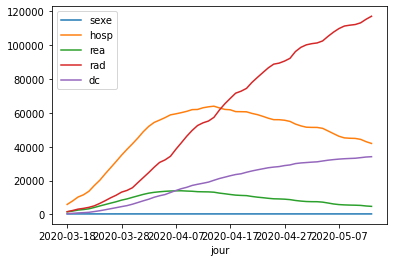

In [29]:
data.groupby("jour").sum().plot()

In [0]:
data["confirmes"] = data["hosp"] + data["rea"] +data['rad']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f61b31ee6a0>,
      dtype=object)

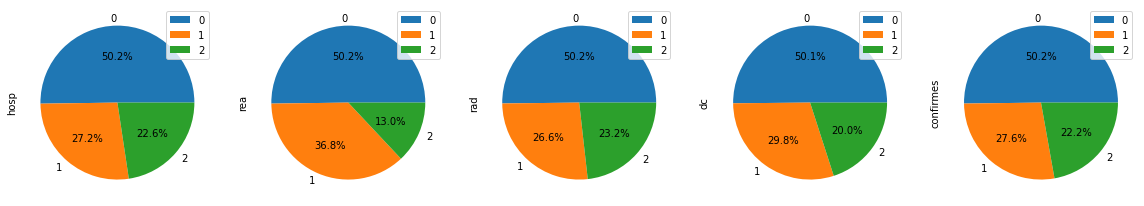

In [31]:
dataSexe = data.groupby(['sexe']).sum()
dataSexe.plot.pie(subplots=True,figsize=(20,20),autopct='%1.1f%%')

In [0]:
dataEvol = data.groupby(['jour']).sum()


Index(['2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
       '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
       '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
       '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
       '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11',
       '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
       '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
       '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
       '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01',
       '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06',
       '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11',
       '2020-05-12', '2020-05-13'],
      dtype='object', name='jour')


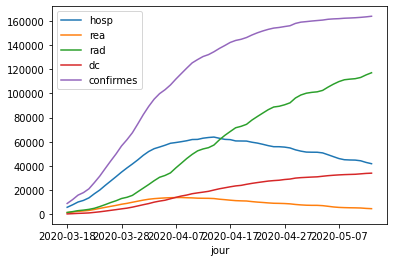

In [33]:
import matplotlib.pyplot as plt
del(dataEvol['sexe'])
jours =  dataEvol.index
print(jours)
dataEvol.plot()

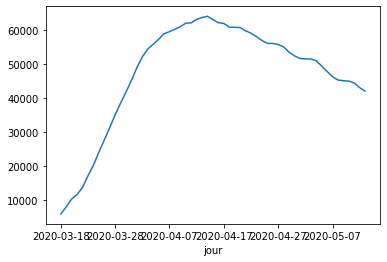

In [34]:
dataEvol['hosp'].plot()

In [35]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

In [0]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [0]:
N = 1000
beta = 1.0  # infected person infects 1 other person per day
D = 4.0 # infections lasts four days
gamma = 1.0 / D

S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible

In [0]:
t = np.linspace(0, 49, 50) # Grid of time points (in days)
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

In [0]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
 
  plt.show();




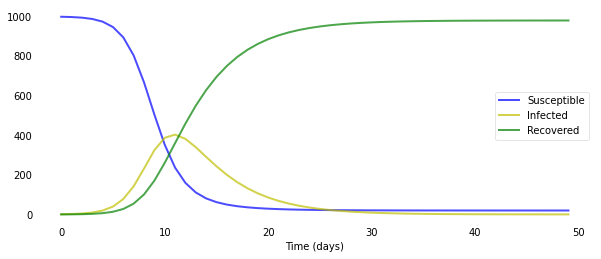

In [40]:
plotsir(t, S, I, R)



In [0]:
import scipy
f = lambda x, param : param*x**2 # la fonction
param_x = 0 # le paramètre à trouver
xrange = list(range(10)) # le nombre de valeurs tests
mesdonnees = [f(i, 2) for i in xrange] # les valeurs tests


In [42]:
params, covariance = scipy.optimize.curve_fit(f, xrange, mesdonnees) # fit
print(f"paramètres = {params}, covariances = {covariance}")

paramètres = [2.], covariances = [[0.]]


In [43]:
f = lambda t, beta, gamma : (odeint(deriv, y0, t, args=(N, beta, gamma)).T)[1] # [1] = only Infected
params, covariance = scipy.optimize.curve_fit(f, range(data.shape[0]), data["confirmes"]) # fit
print(f"paramètres = {params}, covariances = {covariance}")

paramètres = [-4.18870357 -5.69453059], covariances = [[476.29997767 504.83415591]
 [504.83415591 583.85522774]]


In [44]:

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()


In [0]:

def plotseird(t, S, E, I, R, D=None, L=None, R0=None, Alpha=None, CFR=None):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  if D is not None:
    ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
    ax.plot(t, S+E+I+R+D, 'c--', alpha=0.7, linewidth=2, label='Total')
  else:
    ax.plot(t, S+E+I+R, 'c--', alpha=0.7, linewidth=2, label='Total')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend(borderpad=2.0)
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  if L is not None:
      plt.title("Lockdown after {} days".format(L))
  plt.show();

  if R0 is not None or CFR is not None:
    f = plt.figure(figsize=(12,4))
  
  if R0 is not None:
    # sp1
    ax1 = f.add_subplot(121)
    ax1.plot(t, R0, 'b--', alpha=0.7, linewidth=2, label='R_0')

    ax1.set_xlabel('Time (days)')
    ax1.title.set_text('R_0 over time')
    # ax.set_ylabel('Number (1000s)')
    # ax.set_ylim(0,1.2)
    ax1.yaxis.set_tick_params(length=0)
    ax1.xaxis.set_tick_params(length=0)
    ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax1.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)

  if Alpha is not None:
    # sp2
    ax2 = f.add_subplot(122)
    ax2.plot(t, Alpha, 'r--', alpha=0.7, linewidth=2, label='alpha')

    ax2.set_xlabel('Time (days)')
    ax2.title.set_text('fatality rate over time')
    # ax.set_ylabel('Number (1000s)')
    # ax.set_ylim(0,1.2)
    ax2.yaxis.set_tick_params(length=0)
    ax2.xaxis.set_tick_params(length=0)
    ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax2.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)

    plt.show();

In [0]:
def deriv(y, t, N, beta, gamma, delta):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

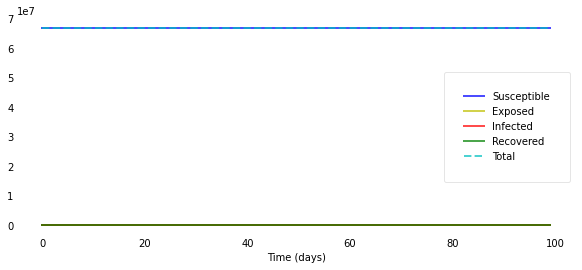

In [47]:

N = 67000000
D = 100.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days
R_0 = 5.0
beta = R_0 * gamma  # R_0 = beta / gamma, so beta = R_0 * gamma
S0, E0, I0, R0 = N-1, 1, 0, 0  # initial conditions: one exposed

t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta))
S, E, I, R = ret.T

plotseird(t, S, E, I, R)

In [0]:
def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

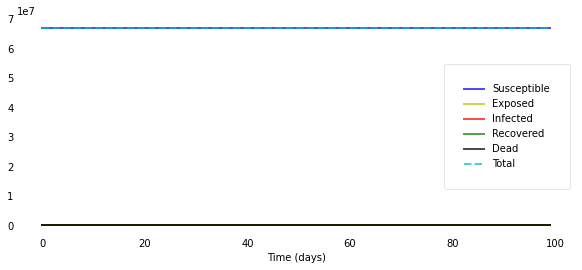

In [49]:
N = 67000000
D = 100.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days
R_0 = 5.0
beta = R_0 * gamma  # R_0 = beta / gamma, so beta = R_0 * gamma
alpha = 0.2  # 20% death rate
rho = 1/9  # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed

t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T

plotseird(t, S, E, I, R, D)

In [0]:
def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [0]:
L = 40

In [0]:


N = 67000000
D = 100.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days
def R_0(t):
    return 5.0 if t < L else 0.9
def beta(t):
    return R_0(t) * gamma

alpha = 0.2  # 20% death rate
rho = 1/9  # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed


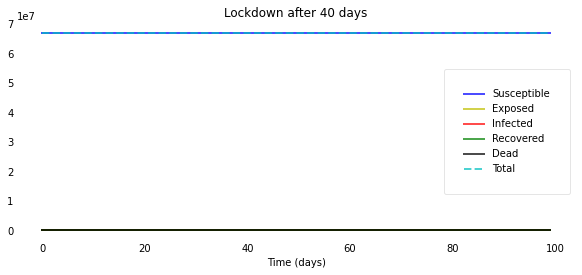

In [53]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T

plotseird(t, S, E, I, R, D, L)


In [0]:

def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt


In [0]:
N = 67000000
D = 100.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days

R_0_start, k, x0, R_0_end = 5.0, 0.5, 50, 0.5


In [0]:
def logistic_R_0(t):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def beta(t):
    return logistic_R_0(t) * gamma

alpha = 0.2  # 20% death rate
rho = 1/9  # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed


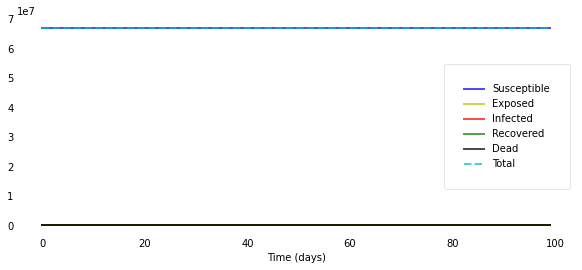

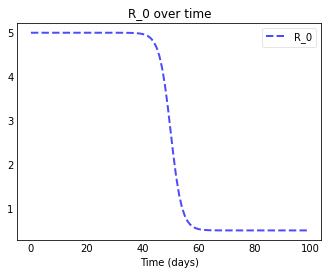

In [57]:

t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T
R0_over_time = [logistic_R_0(i) for i in range(len(t))]  # to plot R_0 over time: get function values

plotseird(t, S, E, I, R, D, R0=R0_over_time)

In [0]:
def deriv(y, t, N, beta, gamma, delta, alpha_opt, rho):
    S, E, I, R, D = y
    def alpha(t):
        return s * I/N + alpha_opt

    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha(t)) * gamma * I - alpha(t) * rho * I
    dRdt = (1 - alpha(t)) * gamma * I
    dDdt = alpha(t) * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt


In [0]:

N = 67000000
D = 100.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days

R_0_start, k, x0, R_0_end = 5.0, 0.5, 50, 0.5

In [0]:


def logistic_R_0(t):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def beta(t):
    return logistic_R_0(t) * gamma

alpha_by_agegroup = {"0-29": 0.01, "30-59": 0.05, "60-89": 0.2, "89+": 0.3}
proportion_of_agegroup = {"0-29": 0.1, "30-59": 0.3, "60-89": 0.4, "89+": 0.2}
s = 0.01
alpha_opt = sum(alpha_by_agegroup[i] * proportion_of_agegroup[i] for i in list(alpha_by_agegroup.keys()))

rho = 1/9  # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed


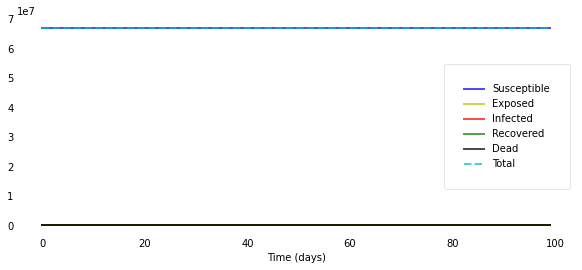

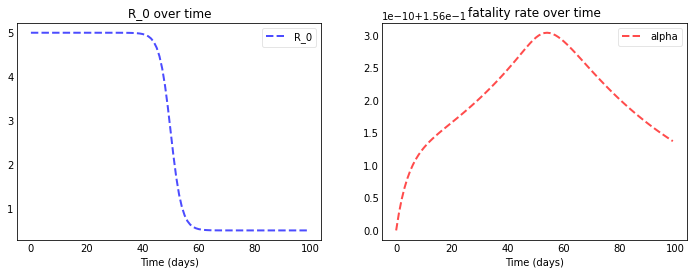

In [61]:

t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha_opt, rho))
S, E, I, R, D = ret.T
R0_over_time = [logistic_R_0(i) for i in range(len(t))]  # to plot R_0 over time: get function values
Alpha_over_time = [s * I[i]/N + alpha_opt for i in range(len(t))]  # to plot alpha over time

plotseird(t, S, E, I, R, D, R0=R0_over_time, Alpha=Alpha_over_time)


In [0]:
# !pip install pygal
# !pip install cairosvg
# import pygal
# import cairosvg
# fr_chart = pygal.maps.fr.Departments()
# fr_chart.title = 'Some departments'
# fr_chart.add('Métropole', ['69', '92', '13'])



In [0]:
# # Import libraries
# import numpy as np 
# import pandas as pd 
# import plotly as py
# import plotly.express as px
# import plotly.graph_objs as go
# from plotly.subplots import make_subplots
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# # Read Data
# df = data
# # Rename columns
# # Manipulate Dataframe
# df_countries = df.groupby(['dep', 'jour']).sum().reset_index().sort_values('jour', ascending=False)
# df_countries = df_countries.drop_duplicates(subset = ['dep'])
# df_countries = df_countries[df_countries['hosp']>0]
# # Create the Choropleth
# fig = go.Figure(data=go.Choropleth(
#     locations = df_countries['dep'],
#     locationmode = 'country names',
#     z = df_countries['hosp'],
#     colorscale = 'Reds',
#     marker_line_color = 'black',
#     marker_line_width = 0.5,
# ))
# fig.update_layout(
#     title_text = 'hosp Cases as of March , 2020',
#     title_x = 0.5,
#     geo=dict(
#         showframe = False,
#         showcoastlines = False,
#         projection_type = 'equirectangular'
#     )
# )

In [0]:
# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))